In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read the logs using pandas

In [2]:
df = pd.read_csv("logs.csv", sep=',', header=None, \
                    names=["UserId", "Event", "StartTime", "EndTime"],\
                    parse_dates=[2, 3], infer_datetime_format=True)

In [3]:
# Read the data
df.head(15)

,UserId,Event,StartTime,EndTime
0,1,P1,2014-11-01 14:23:24,NaT
1,1,P1M4L2A1,2014-11-08 08:30:02,2014-11-08 08:30:02
2,1,P1M4L2A2,2014-11-11 15:42:13,2014-11-11 15:42:13
3,1,P1M4L2S1,2014-11-17 16:21:05,2014-11-17 16:21:05
4,1,P1M4L2V2,2014-11-25 00:51:13,2014-11-25 02:51:13
5,1,P1M4L1Q1,2014-12-04 11:54:31,2014-12-04 12:24:31
6,1,P1M4L1V2,2014-12-07 05:07:30,2014-12-07 07:07:30
7,1,P1M4L1A1,2014-12-13 23:39:37,2014-12-13 23:39:37
8,1,P1M4L1V1,2014-12-16 06:17:14,2014-12-16 08:17:14
9,1,P1M4L1S1,2014-12-21 04:46:38,2014-12-21 04:46:38


In [4]:
df.dropna(inplace=True)

- P Program
- M Module
- L Lesson
- A Additional Links
- Q Quiz
- V Video
- S Assignment
- F Final Assignment

#### Each program is 1 year, Each module lasts 3 months, each Lesson is 1 month
- Every lesson has 8 events.
- Quiz and Assignment only once
- Video is 2hr duration
- Quiz is 30min
- Additional links and Assignments, start and end time is same
- Timeframe chosen is 2013-2018

In [5]:
df[df["UserId"]==15].shape

(73, 4)

In [6]:
df.shape

(844351, 4)

In [7]:
df.dtypes

UserId                int64
Event                object
StartTime    datetime64[ns]
EndTime      datetime64[ns]
dtype: object

In [8]:
# Change the datatype of first column to integer
df["UserId"] = df["UserId"].astype(np.int64)

# To do
1. Transform into matrix
2. Viz


In [9]:
df.shape

(844351, 4)

In [10]:
"Q" in "Q23dsffs"

True

In [11]:
quizesDf = df[df.apply(lambda x: "Q" in x['Event'], axis=1)]

In [12]:
quizesDf.shape

(90694, 4)

In [13]:
quizesDf.head()

,UserId,Event,StartTime,EndTime
5,1,P1M4L1Q1,2014-12-04 11:54:31,2014-12-04 12:24:31
20,1,P1M4L3Q1,2015-01-17 13:57:42,2015-01-17 14:27:42
31,1,P1M1L1Q1,2015-02-15 18:47:52,2015-02-15 19:17:52
35,1,P1M1L3Q1,2015-03-08 04:38:36,2015-03-08 05:08:36
38,1,P1M1L2Q1,2015-03-31 23:24:01,2015-03-31 23:54:01


In [14]:
q = quizesDf["Event"].unique()

In [15]:
quizMatrix = pd.DataFrame(columns=np.append(np.array(["UserId"]), q))

In [16]:
quizMatrix.head()

,UserId,P1M4L1Q1,P1M4L3Q1,P1M1L1Q1,P1M1L3Q1,P1M1L2Q1,P1M2L3Q1,P1M2L2Q1,P1M2L1Q1,P1M3L2Q1,P1M3L3Q1,P1M3L1Q1,P1M4L2Q1


In [17]:
grouped = quizesDf.groupby(by="UserId")

In [18]:
for userid, group in grouped:
    temDict = {"UserId": userid}
    for row in group.iterrows():
        temDict[row[1]["Event"]] = 1
    quizMatrix = quizMatrix.append(temDict, ignore_index=True)

In [19]:
quizMatrix.fillna(0, inplace=True)

In [20]:
# quizMatrix.loc[quizMatrix["UserId"] == 1,"P1M4L2Q1"] = 10

In [21]:
quizMatrix.head(100)

,UserId,P1M4L1Q1,P1M4L3Q1,P1M1L1Q1,P1M1L3Q1,P1M1L2Q1,P1M2L3Q1,P1M2L2Q1,P1M2L1Q1,P1M3L2Q1,P1M3L3Q1,P1M3L1Q1,P1M4L2Q1
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,5.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
5,6.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
9,10.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


1. Matrix with scores (1 to 10), >5 is pass
2. Store scores in db

In [22]:
df_scores = pd.read_csv("quiz.csv", sep=',', header=None, \
                    names=["UserId", "Event", "Score", "Student Type"])

**Student Type:**
T - Brilliant
A - Average
P - Below Average


In [23]:
df_scores.head(11)

,UserId,Event,Score,Student Type
0,1,P1M4L1Q1TS,5,T
1,1,P1M4L3Q1TS,6,T
2,1,P1M1L1Q1TS,10,T
3,1,P1M1L3Q1TS,10,T
4,1,P1M1L2Q1TS,10,T
5,1,P1M2L3Q1TS,9,T
6,1,P1M2L2Q1TS,9,T
7,1,P1M2L1Q1TS,9,T
8,1,P1M3L2Q1TS,9,T
9,1,P1M3L3Q1TS,8,T


In [24]:
#df_scores_totalscores = df_scores[df_scores["Event"].apply(lambda event: "TS" in event)]

In [25]:
for index, row in df_scores.iterrows():
    quizMatrix.loc[quizMatrix["UserId"] == row["UserId"], row["Event"][:-2]] = row["Score"]

In [26]:
quizMatrix.head(10)

,UserId,P1M4L1Q1,P1M4L3Q1,P1M1L1Q1,P1M1L3Q1,P1M1L2Q1,P1M2L3Q1,P1M2L2Q1,P1M2L1Q1,P1M3L2Q1,P1M3L3Q1,P1M3L1Q1,P1M4L2Q1
0,1.0,5.0,6.0,10.0,10.0,10.0,9.0,9.0,9.0,9.0,8.0,8.0,0.0
1,2.0,4.0,7.0,10.0,10.0,10.0,10.0,0.0,9.0,8.0,6.0,9.0,8.0
2,3.0,6.0,6.0,10.0,0.0,10.0,10.0,9.0,7.0,0.0,9.0,9.0,5.0
3,4.0,5.0,8.0,10.0,0.0,10.0,10.0,8.0,9.0,8.0,8.0,7.0,0.0
4,5.0,0.0,4.0,10.0,8.0,7.0,8.0,10.0,8.0,0.0,6.0,6.0,4.0
5,6.0,5.0,0.0,5.0,9.0,0.0,7.0,9.0,0.0,5.0,6.0,0.0,5.0
6,7.0,4.0,5.0,0.0,9.0,8.0,7.0,8.0,6.0,4.0,7.0,0.0,3.0
7,8.0,6.0,0.0,7.0,9.0,7.0,8.0,7.0,8.0,2.0,6.0,4.0,7.0
8,9.0,8.0,0.0,0.0,8.0,10.0,0.0,6.0,7.0,6.0,5.0,5.0,0.0
9,10.0,0.0,5.0,9.0,10.0,10.0,9.0,7.0,7.0,5.0,0.0,6.0,4.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa815e6d2e8>]], dtype=object)

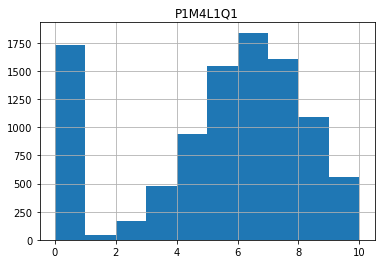

In [27]:
quizMatrix.hist("P1M4L1Q1")

In [28]:
import seaborn as sns

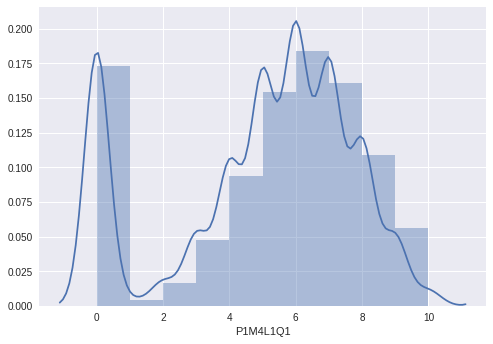

In [29]:
sns.distplot(quizMatrix["P1M4L1Q1"], bins=10)

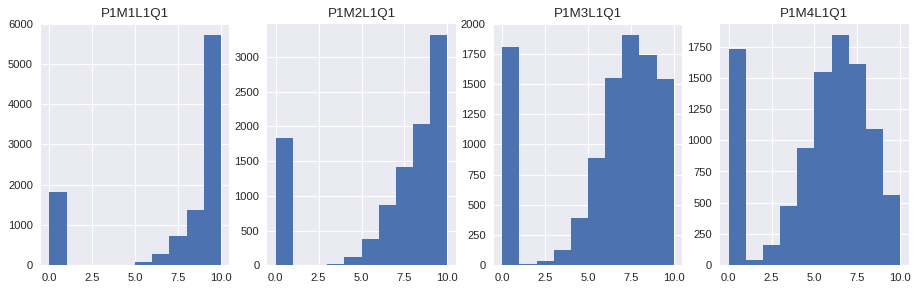

In [30]:
# plt.subplot(nrows, ncols, plot_number)
plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,4,1)
plt.hist(x = "P1M1L1Q1",data=quizMatrix)
plt.axis()
plt.title("P1M1L1Q1")
plt.subplot(1,4,2)
plt.hist(x = "P1M2L1Q1",data=quizMatrix)
plt.title("P1M2L1Q1")
plt.subplot(1,4,3)
plt.hist(x = "P1M3L1Q1",data=quizMatrix)
plt.title("P1M3L1Q1")
plt.subplot(1,4,4)
plt.hist(x = "P1M4L1Q1",data=quizMatrix)
plt.title("P1M4L1Q1")
plt.show()

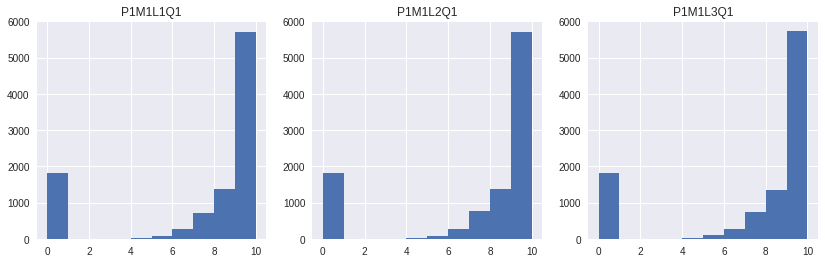

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].hist(x = "P1M1L1Q1",data=quizMatrix)
axes[0].set_ylim([0, 6000])
axes[0].set_title("P1M1L1Q1")

axes[1].hist(x = "P1M1L2Q1",data=quizMatrix)
axes[1].set_ylim([0, 6000])
axes[1].set_title("P1M1L2Q1")

axes[2].hist(x = "P1M1L3Q1",data=quizMatrix)
axes[2].set_ylim([0, 6000])
axes[2].set_title("P1M1L3Q1")

plt.show()

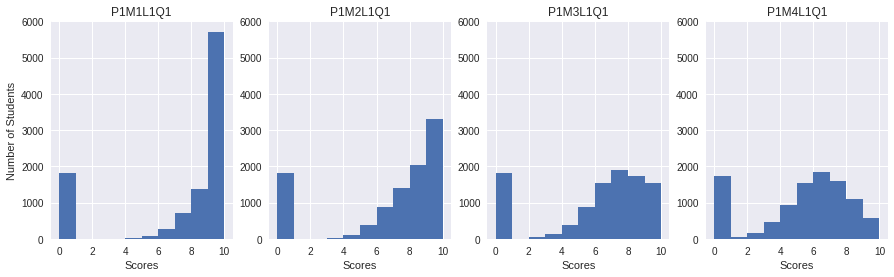

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

axes[0].hist(x = "P1M1L1Q1",data=quizMatrix)
axes[0].set_xlabel('Scores')
axes[0].set_ylabel('Number of Students')
axes[0].set_ylim([0, 6000])
axes[0].set_title("P1M1L1Q1")

axes[1].hist(x = "P1M2L1Q1",data=quizMatrix)
axes[1].set_xlabel('Scores')
axes[1].set_ylim([0, 6000])
axes[1].set_title("P1M2L1Q1")

axes[2].hist(x = "P1M3L1Q1",data=quizMatrix)
axes[2].set_xlabel('Scores')
axes[2].set_ylim([0, 6000])
axes[2].set_title("P1M3L1Q1")

axes[3].hist(x = "P1M4L1Q1",data=quizMatrix)
axes[3].set_xlabel('Scores')
axes[3].set_ylim([0, 6000])
axes[3].set_title("P1M4L1Q1")

plt.show()

## Surprise package

In [33]:
quiz = []
user = []
score = []
for row in quizMatrix.iterrows():
    user_id = row[1]["UserId"]
    for index, val in row[1].iteritems():
        if index != "UserId" and val != 0:
            quiz.append(index)
            user.append(user_id)
            score.append(val)

In [49]:
print(quiz[1], user[1], score[1])

P1M4L3Q1 1.0 6.0


In [34]:
from surprise import NormalPredictor
from surprise import Reader
from surprise import SVD
from surprise import Dataset, evaluate
from surprise.model_selection import cross_validate

# Creation of the dataframe. Column names are irrelevant.
ratings_dict = {'itemID': quiz,
                'userID': user,
                'rating': score}
df_1 = pd.DataFrame(ratings_dict)

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 10))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df_1[['userID', 'itemID', 'rating']], reader)

In [54]:
print(data)

In [35]:
algo = SVD()

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo.fit(trainset)

In [50]:
quizMatrix.head()

,UserId,P1M4L1Q1,P1M4L3Q1,P1M1L1Q1,P1M1L3Q1,P1M1L2Q1,P1M2L3Q1,P1M2L2Q1,P1M2L1Q1,P1M3L2Q1,P1M3L3Q1,P1M3L1Q1,P1M4L2Q1
0,1.0,5.0,6.0,10.0,10.0,10.0,9.0,9.0,9.0,9.0,8.0,8.0,0.0
1,2.0,4.0,7.0,10.0,10.0,10.0,10.0,0.0,9.0,8.0,6.0,9.0,8.0
2,3.0,6.0,6.0,10.0,0.0,10.0,10.0,9.0,7.0,0.0,9.0,9.0,5.0
3,4.0,5.0,8.0,10.0,0.0,10.0,10.0,8.0,9.0,8.0,8.0,7.0,0.0
4,5.0,0.0,4.0,10.0,8.0,7.0,8.0,10.0,8.0,0.0,6.0,6.0,4.0


In [61]:
# Predict a certain item
userid = str(46)
itemid = "P1M4L3Q1"
x = algo.predict(userid, itemid)

In [68]:
round(x.est)

6.0

In [70]:
for i, row in enumerate(quizMatrix.iterrows()):
    if i == 10: break
    user_id = row[1]["UserId"]
    for quiz_id, val in row[1].iteritems():
        if quiz_id == "UserId": continue
        print("UserId {}: Quiz {}: Actual: {}: Predicted: {}".format(user_id, quiz_id,\
                                                                     val, \
                                                                     round(algo.predict(user_id, quiz_id).est)))

UserId 1.0: Quiz P1M4L1Q1: Actual: 5.0: Predicted: 5.0
UserId 1.0: Quiz P1M4L3Q1: Actual: 6.0: Predicted: 6.0
UserId 1.0: Quiz P1M1L1Q1: Actual: 10.0: Predicted: 10.0
UserId 1.0: Quiz P1M1L3Q1: Actual: 10.0: Predicted: 10.0
UserId 1.0: Quiz P1M1L2Q1: Actual: 10.0: Predicted: 10.0
UserId 1.0: Quiz P1M2L3Q1: Actual: 9.0: Predicted: 9.0
UserId 1.0: Quiz P1M2L2Q1: Actual: 9.0: Predicted: 9.0
UserId 1.0: Quiz P1M2L1Q1: Actual: 9.0: Predicted: 9.0
UserId 1.0: Quiz P1M3L2Q1: Actual: 9.0: Predicted: 9.0
UserId 1.0: Quiz P1M3L3Q1: Actual: 8.0: Predicted: 8.0
UserId 1.0: Quiz P1M3L1Q1: Actual: 8.0: Predicted: 8.0
UserId 1.0: Quiz P1M4L2Q1: Actual: 0.0: Predicted: 7.0
UserId 2.0: Quiz P1M4L1Q1: Actual: 4.0: Predicted: 4.0
UserId 2.0: Quiz P1M4L3Q1: Actual: 7.0: Predicted: 7.0
UserId 2.0: Quiz P1M1L1Q1: Actual: 10.0: Predicted: 10.0
UserId 2.0: Quiz P1M1L3Q1: Actual: 10.0: Predicted: 10
UserId 2.0: Quiz P1M1L2Q1: Actual: 10.0: Predicted: 10.0
UserId 2.0: Quiz P1M2L3Q1: Actual: 10.0: Predicted: 9.0

In [75]:
userId = 10000
for i, row in enumerate(quizMatrix[quizMatrix["UserId"] == userId].iterrows()):
    if i == 10: break
    user_id = row[1]["UserId"]
    for quiz_id, val in row[1].iteritems():
        if quiz_id == "UserId": continue
        print("UserId {}: Quiz {}: Actual: {}: Predicted: {}".format(user_id, quiz_id,\
                                                                     val, \
                                                                     round(algo.predict(user_id, quiz_id).est)))

UserId 10000.0: Quiz P1M4L1Q1: Actual: 3.0: Predicted: 3.0
UserId 10000.0: Quiz P1M4L3Q1: Actual: 3.0: Predicted: 4.0
UserId 10000.0: Quiz P1M1L1Q1: Actual: 9.0: Predicted: 8.0
UserId 10000.0: Quiz P1M1L3Q1: Actual: 8.0: Predicted: 8.0
UserId 10000.0: Quiz P1M1L2Q1: Actual: 8.0: Predicted: 8.0
UserId 10000.0: Quiz P1M2L3Q1: Actual: 5.0: Predicted: 6.0
UserId 10000.0: Quiz P1M2L2Q1: Actual: 8.0: Predicted: 8.0
UserId 10000.0: Quiz P1M2L1Q1: Actual: 0.0: Predicted: 7.0
UserId 10000.0: Quiz P1M3L2Q1: Actual: 0.0: Predicted: 7.0
UserId 10000.0: Quiz P1M3L3Q1: Actual: 6.0: Predicted: 6.0
UserId 10000.0: Quiz P1M3L1Q1: Actual: 0.0: Predicted: 5.0
UserId 10000.0: Quiz P1M4L2Q1: Actual: 6.0: Predicted: 6.0


In [79]:
#cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [80]:
from sklearn.metrics import accuracy_score

In [98]:
actual = []
predicted = []
for i, row in enumerate(quizMatrix.iterrows()):
    user_id = row[1]["UserId"]
    for quiz_id, score in row[1].iteritems():
        if quiz_id == "UserId" or score == 0: continue
        actual.append(score)
        predicted.append(round(algo.predict(user_id, quiz_id).est))

In [99]:
predicted

[5.0,
 6.0,
 10.0,
 10.0,
 10.0,
 9.0,
 9.0,
 9.0,
 9.0,
 8.0,
 8.0,
 4.0,
 7.0,
 10.0,
 10,
 10.0,
 9.0,
 9.0,
 8.0,
 7.0,
 8.0,
 8.0,
 6.0,
 6.0,
 10,
 10.0,
 9.0,
 9.0,
 8.0,
 9.0,
 9.0,
 5.0,
 5.0,
 8.0,
 9.0,
 10.0,
 10.0,
 8.0,
 9.0,
 8.0,
 8.0,
 7.0,
 4.0,
 9.0,
 8.0,
 8.0,
 8.0,
 9.0,
 8.0,
 6.0,
 6.0,
 4.0,
 5.0,
 8.0,
 8.0,
 7.0,
 8.0,
 5.0,
 6.0,
 5.0,
 4.0,
 5.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 5.0,
 7.0,
 3.0,
 6.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 3.0,
 6.0,
 5.0,
 7.0,
 8.0,
 8.0,
 9.0,
 7.0,
 7.0,
 6.0,
 6.0,
 6.0,
 5.0,
 9.0,
 9.0,
 9.0,
 9.0,
 7.0,
 7.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 9.0,
 9.0,
 9.0,
 5.0,
 7.0,
 7.0,
 5.0,
 8.0,
 6.0,
 4.0,
 4.0,
 5.0,
 10,
 10.0,
 10.0,
 8.0,
 9.0,
 8.0,
 10.0,
 8.0,
 9.0,
 8.0,
 6.0,
 7.0,
 9.0,
 9.0,
 8.0,
 7.0,
 8.0,
 7.0,
 9.0,
 8.0,
 8.0,
 5.0,
 5.0,
 8.0,
 10.0,
 10.0,
 9.0,
 8.0,
 7.0,
 7.0,
 6.0,
 6.0,
 7.0,
 9.0,
 9.0,
 9.0,
 6.0,
 6.0,
 8.0,
 7.0,
 8.0,
 7.0,
 10.0,
 10,
 10.0,
 9.0,
 9.0,
 10.0,
 7.0,
 9.0,
 9.0,
 8.0

In [100]:
accuracy_score(actual, predicted)

0.74396110646798619